In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for scatter colors
from matplotlib.colors import ListedColormap
colors = ListedColormap(['red', 'green'])
classes = ['bocciato', 'passato']

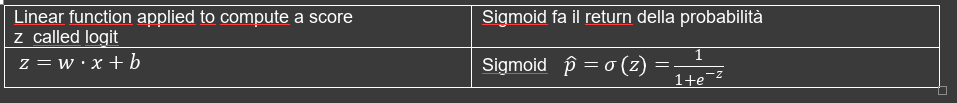

In [2]:
def sigmoid(z):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-z))


def logreg_inference(x, w, b): # z = w.T x + b 
    """Inference step for the logistic regression model."""
    logit  = (x @ w) + b    # no need to transpose becuse there is no transpose for vectors in phyton
                            # prodotto scalare    z = w_0 * x_0 + w_1 * x_1
    p = sigmoid(logit)   # 1 / (1 + np.exp(-z))
    return p

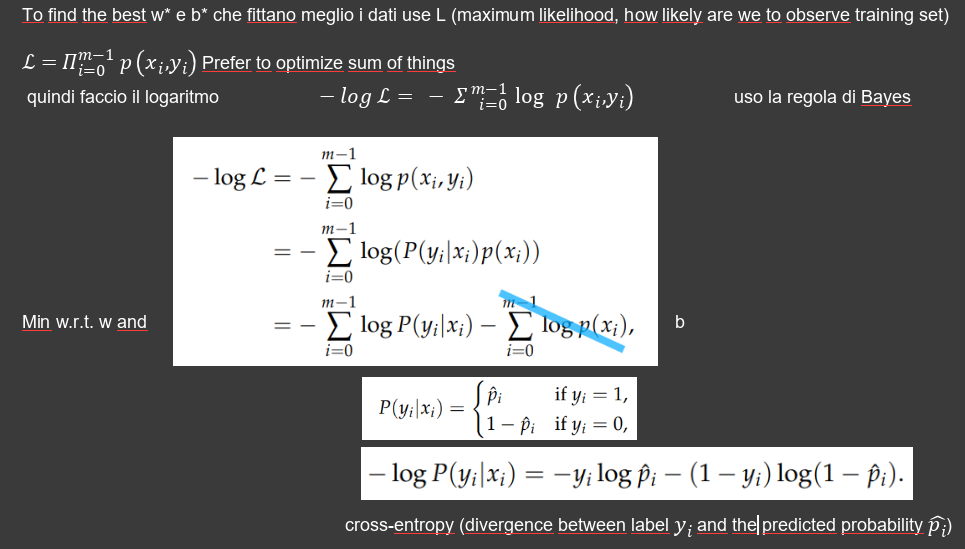

### per capire quanto sono corretti i w e b che ho trovato

In [3]:
def cross_entropy(P, Y):
    """Binary cross-entropy."""
    return (-Y * np.log(P) - (1 - Y) * np.log(1 - P)).mean()

### Training procedure, cicla

In [4]:
def logreg_train(X, Y):
    """
    Training procedure for the logistic regression model. 
    Use gradient decend   
    w' = w - eta * gradient(L)   w.r.t. w
    b' = b - eta * gradient(L)   w.r.t. b
    """
    m, n = X.shape   # n has the number of features (x_0, x_1)

    # starting points
    w = np.zeros(n) # w vett dei parametri, start point, convex function doesn't matter where we start
    b = 0           # convex function doesn't matter where we start

    lr = 0.01   # learning rate
    
    for step in range(100000):
        P = logreg_inference(X, w, b)
        if step % 1000 == 0: # to print every thousand cycles
            loss = cross_entropy(P, Y) # per capire quanto sono corretti w e b che ho trovato
            print("step:", step,"    loss:  ", loss)
        grad_w = (X.T @ (P - Y)) / m  # gradient w.r.t. w     .T per fare il trasposto
        grad_b = (P - Y).mean()       # gradient w.r.t. b
        # Gradient descent updates.
        
        w -= lr * grad_w  # e qui li aggiorno
        b -= lr * grad_b
        
    return w, b

### Main
Load the data, train the model and measure the accuracy.

In [ ]:
data = np.loadtxt("exam.txt")  # returns the matrix  [# ore studiate    # ore a lezione   1 se passato]

X = data[:, :-1]  # :2     [# ore studiate    # ore a lezione]
Y = data[:, -1]   #        [1 se passato]

w, b = logreg_train(X, Y)  # <-------------------------

P = logreg_inference(X, w, b) # <--------------------- 

Yhat = (P >= 0.5) # prediction
accuracy = (Y == Yhat).mean()
print("Final accuracy:", accuracy * 100)

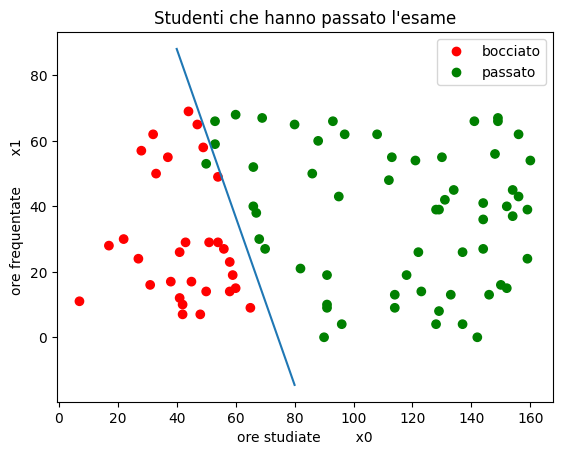

In [6]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=colors)

# decision boundary
x0 = np.linspace(40,80,100)
x1 = 1/w[1]*(-w[0]*x0-b)
plt.plot(x0, x1)

plt.title("Studenti che hanno passato l'esame")
plt.xlabel("ore studiate        x0"); plt.ylabel("ore frequentate       x1")
plt.legend(handles=scatter.legend_elements()[0], labels=classes); plt.show()